In [1]:
# read train_set and test_set back into dataframes
import pandas as pd
train_set = pd.read_csv('data/train_set.csv')
test_set = pd.read_csv('data/test_set.csv')

Eb
7
dim
(84, 130)


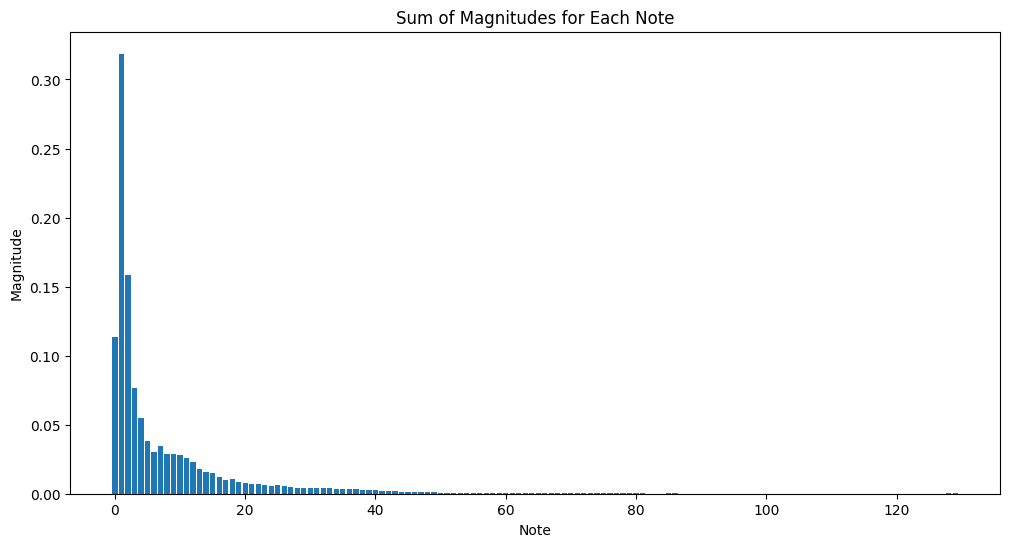

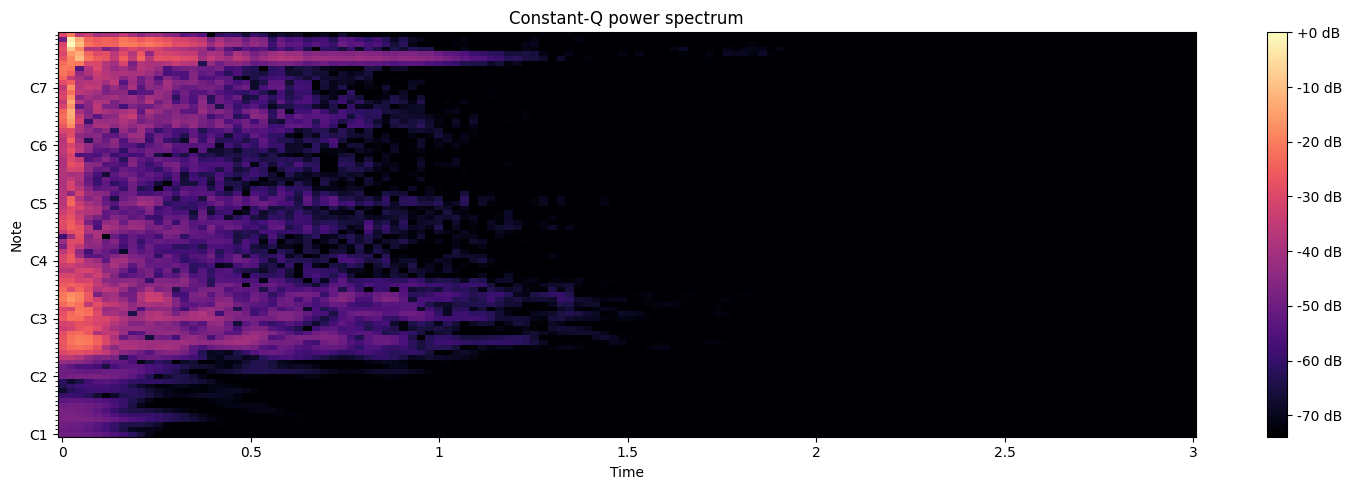

In [2]:
# write a function that calculates the constant q-transform of a wav file
import numpy as np
import librosa

def get_cqt(wav_file_path, sr=22050, hop_length=512, bins_per_octave=12, n_bins=7*12, fmin=librosa.note_to_hz('C1')):
    # Remove 'data/' prefix from file path
    # wav_file_path = wav_file_path.replace('data/', '')
    
    y, sr = librosa.load(wav_file_path, sr=sr)
    cqt = np.abs(librosa.cqt(y=y, sr=sr, hop_length=hop_length, bins_per_octave=bins_per_octave, n_bins=n_bins, fmin=fmin))
    return cqt

# calculate the cqt of the first file in the training set
cqt = get_cqt(train_set['File Path'].iloc[0])

# print the Root Note, Octave, and Quality of the first file in the training set
print(train_set['Root Note'].iloc[0])
print(train_set['Octave'].iloc[0])
print(train_set['Quality'].iloc[0])

print(cqt.shape)
# plot cqt values for first second of the first file
import matplotlib.pyplot as plt
# sum up the magnitudes of every note
note_magnitudes = np.sum(cqt, axis=0)

# plot the magnitudes with a bar graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(note_magnitudes)), note_magnitudes)
plt.xlabel('Note')
plt.ylabel('Magnitude')
plt.title('Sum of Magnitudes for Each Note')
plt.show()


plt.figure(figsize=(15, 5))
librosa.display.specshow(librosa.amplitude_to_db(cqt, ref=np.max), sr=22050, hop_length=512, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()

C 3 maj 1


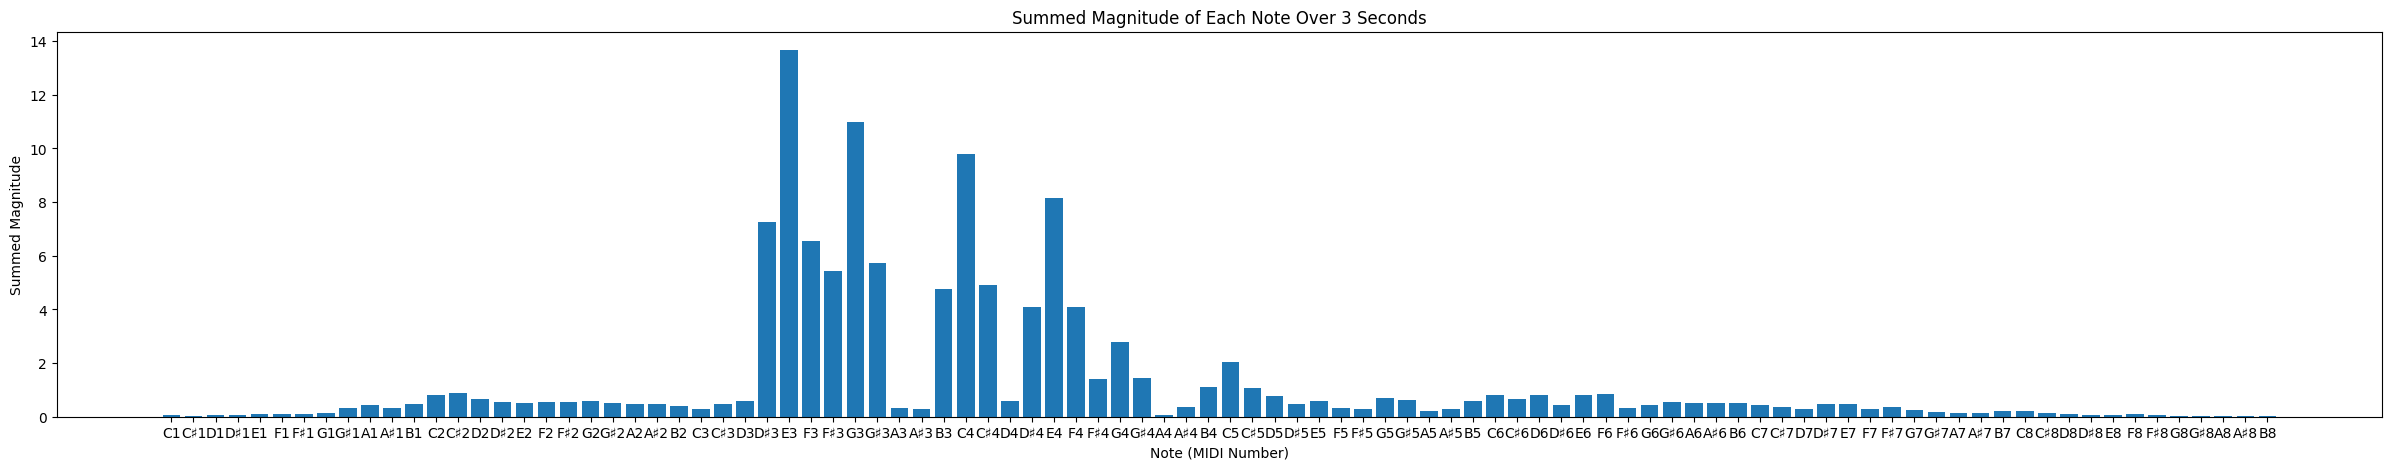

In [17]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def compute_note_magnitudes(y, sr=22050, hop_length=512, bins_per_octave=12, n_bins=7*12, fmin=librosa.note_to_hz('C1')):
    # Compute CQT
    cqt = librosa.core.cqt(y, sr=sr, hop_length=hop_length, bins_per_octave=bins_per_octave, n_bins=n_bins, fmin=fmin)

    # Sum magnitudes for each note (sum along the time axis)
    note_magnitudes = np.sum(np.abs(cqt), axis=1)

    return note_magnitudes


INDEX_TO_PRINT = 500

# Example usage:
# Load your 3-second audio signal
y, sr = librosa.load(train_set['File Path'].iloc[INDEX_TO_PRINT], duration=3.0)


print(train_set['Root Note'].iloc[INDEX_TO_PRINT], train_set['Octave'].iloc[INDEX_TO_PRINT], train_set['Quality'].iloc[INDEX_TO_PRINT], train_set['Inversion'].iloc[INDEX_TO_PRINT])

# Compute note magnitudes
note_magnitudes = compute_note_magnitudes(y, sr=sr, n_bins=8*12, fmin=librosa.note_to_hz('C1'))

# Plot the magnitudes of each note
notes = librosa.midi_to_note(librosa.hz_to_midi(librosa.cqt_frequencies(n_bins=8*12, fmin=librosa.note_to_hz('C1'))))

# Plot the magnitudes with a bar graph
plt.figure(figsize=(30, 5))
plt.bar(range(len(note_magnitudes)), note_magnitudes)
plt.xlabel('Note (MIDI Number)')
plt.ylabel('Summed Magnitude')
plt.title('Summed Magnitude of Each Note Over 3 Seconds')

# Set the x-axis tick labels for every three notes
plt.xticks(range(0, len(notes), 1), notes[::1])

plt.show()


In [4]:
# print a list of unique root notes, octaves, qualities, and inversions
print(train_set['Root Note'].unique())
print(train_set['Quality'].unique())

['Eb' 'C' 'E' 'Bb' 'Ab' 'C#' 'F' 'D' 'A' 'F#' 'B' 'G']
['dim' 'min7b5' 'dim7' 'min' 'maj7_2' 'seventh' 'sixth' 'maj6' 'maj7'
 'min3' 'min2' 'maj' 'maj3' 'aug6' 'aug' 'perf4' 'octave' 'perf5' 'sus2'
 'min7' 'maj2' 'min6']


In [7]:
# create a new training and test set with chords of only the following qualities: ['maj', 'min', 'dim', 'aug']
train_set = train_set[train_set['Quality'].isin(['maj', 'min', 'dim', 'aug'])]
test_set = test_set[test_set['Quality'].isin(['maj', 'min', 'dim', 'aug'])]

# remove all augmented chords that are not in root position
train_set = train_set[~((train_set['Quality'] == 'aug') & (train_set['Inversion'] != 0))]
test_set = test_set[~((test_set['Quality'] == 'aug') & (test_set['Inversion'] != 0))]

# print the number of each chord quality in the test and training sets
print(train_set['Quality'].value_counts())
print(test_set['Quality'].value_counts())

Quality
dim    178
min    178
maj    178
aug     64
Name: count, dtype: int64
Quality
min    77
dim    77
maj    77
aug    21
Name: count, dtype: int64


In [6]:
# save the new training and test sets to csv files
train_set.to_csv('data/train_set_simplified.csv', index=False)
test_set.to_csv('data/test_set_simplified.csv', index=False)

#### Same thing with Chroma

In [4]:
# read train_set and test_set back into dataframes
import pandas as pd
train_set = pd.read_csv('data/train_set_simplified.csv')
test_set = pd.read_csv('data/test_set_simplified.csv')

D 5 maj 2


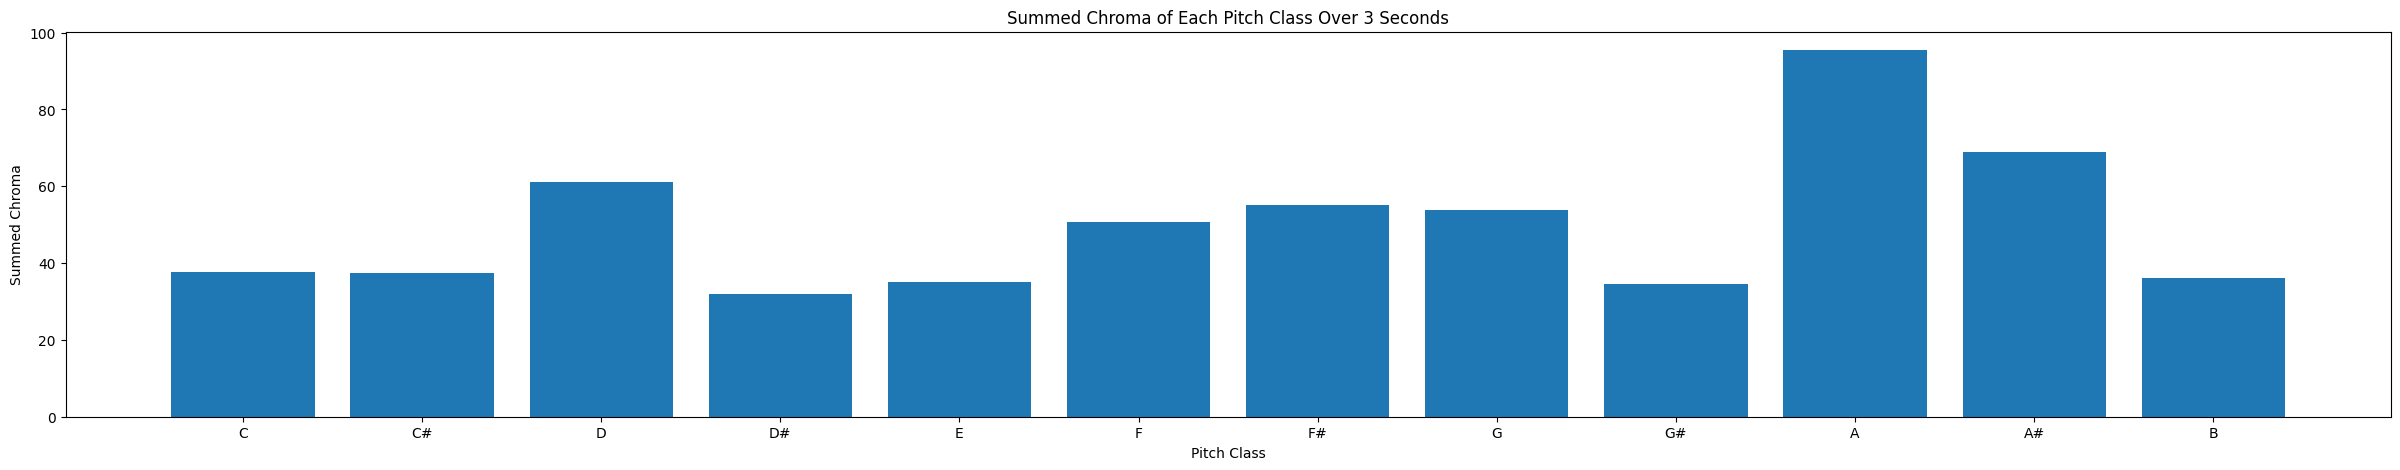

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def compute_chroma(y, sr=22050, hop_length=512):
    # Compute chroma features
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=hop_length)

    # Sum chroma features along the time axis
    chroma_sum = np.sum(chroma, axis=1)

    return chroma_sum


INDEX_TO_PRINT = 125

# Example usage:
# Load your 3-second audio signal
y, sr = librosa.load(train_set['File Path'].iloc[INDEX_TO_PRINT], duration=3.0)


print(train_set['Root Note'].iloc[INDEX_TO_PRINT], train_set['Octave'].iloc[INDEX_TO_PRINT], train_set['Quality'].iloc[INDEX_TO_PRINT], train_set['Inversion'].iloc[INDEX_TO_PRINT])

# Compute chroma features
chroma_sum = compute_chroma(y, sr=sr)

# Plot the chroma features
plt.figure(figsize=(30, 5))
plt.bar(range(len(chroma_sum)), chroma_sum)
plt.xlabel('Pitch Class')
plt.ylabel('Summed Chroma')
plt.title('Summed Chroma of Each Pitch Class Over 3 Seconds')

# Set the x-axis tick labels for each pitch class
pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.xticks(range(len(pitch_classes)), pitch_classes)

plt.show()


### Feature Extraction
Some Ideas of what to capture:
- extract the notes with the highest magnitudes from the cqt
- find the best "match" chord based on the matching & extraction algorithm, add those notes as a feature
- get the distances between the notes of the root position version of the chord and add that as a feature

D 7 aug 2
[82, 86, 90]
[0.09145506 0.06986302 0.04483722]
['A♯7' 'D8' 'F♯8']


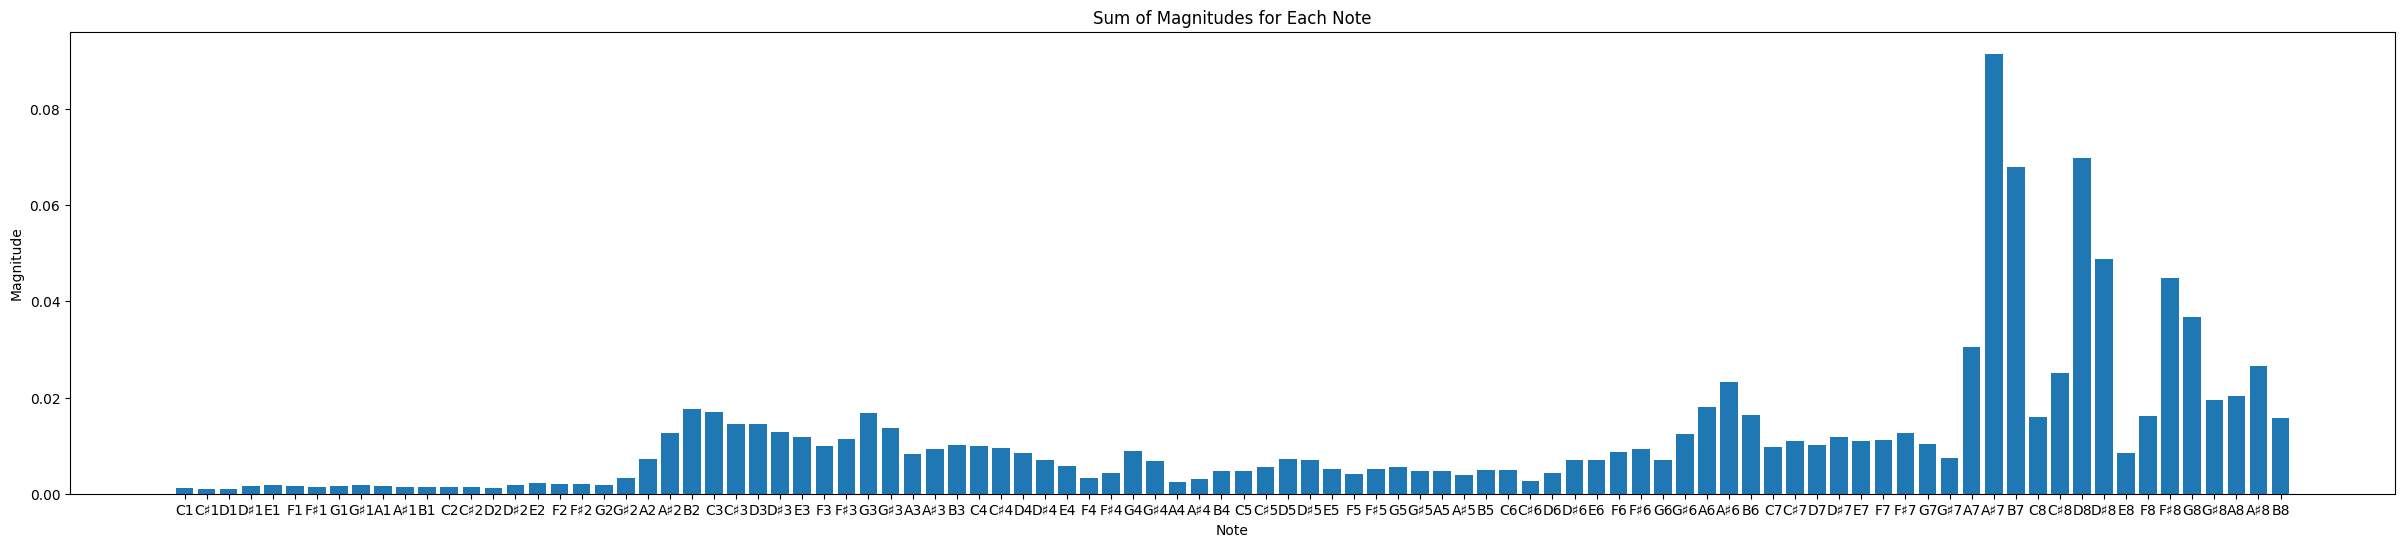

In [5]:
# based on the CQT of the first training set item get the most prominent notes based on these rules:
# in the order of the most prominent notes, add the note to the list if;
# the distance between the note and any other note in top_list is greater than 2 but less than 10
# print the top 6 notes that fit this description and their magnitudes
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def compute_note_magnitudes(y, sr=22050, hop_length=512, bins_per_octave=12, n_bins=7*12, fmin=librosa.note_to_hz('C1')):
    # Compute CQT
    cqt = librosa.core.cqt(y, sr=sr, hop_length=hop_length, bins_per_octave=bins_per_octave, n_bins=n_bins, fmin=fmin)

    # Sum magnitudes for each note (sum along the time axis)
    note_magnitudes = np.sum(np.abs(cqt), axis=1)

    return note_magnitudes


notes = librosa.midi_to_note(librosa.hz_to_midi(librosa.cqt_frequencies(n_bins=8*12, fmin=librosa.note_to_hz('C1'))))


INDEX_TO_PRINT = 224

# Example usage:
# Load your 3-second audio signal
y, sr = librosa.load(train_set['File Path'].iloc[INDEX_TO_PRINT], duration=3.0)


print(train_set['Root Note'].iloc[INDEX_TO_PRINT], train_set['Octave'].iloc[INDEX_TO_PRINT], train_set['Quality'].iloc[INDEX_TO_PRINT], train_set['Inversion'].iloc[INDEX_TO_PRINT])

note_magnitudes = compute_note_magnitudes(y, sr=sr, n_bins=8*12, fmin=librosa.note_to_hz('C1'))

# sort the notes by their magnitudes
sorted_notes = np.argsort(note_magnitudes)


# reverse the order of the sorted notes
sorted_notes = sorted_notes[::-1]

top_list = pd.array([], dtype=object)
# for each note in the sorted list, add it to the list if the distance between the note and any other note in top_list is greater than 2 but less than 10

for note in sorted_notes:
    if len(top_list) == 0:
        top_list.append(note)
    else:
        if all(abs(note - top_note) > 2 and abs(note - top_note) < 10 for top_note in top_list):
            top_list.append(note)
    if len(top_list) == 6:
        break

# print the top 6 notes and their magnitudes
print(top_list[-6:])
print(note_magnitudes[top_list[-6:]])
print(notes[top_list[-6:]])

# plot the top 6 notes and their magnitudes
plt.figure(figsize=(30, 6))
plt.bar(range(len(note_magnitudes)), note_magnitudes)
plt.xlabel('Note')
plt.ylabel('Magnitude')
plt.title('Sum of Magnitudes for Each Note')
plt.xticks(range(0, len(notes), 1), notes[::1])
plt.show()

In [8]:
# take top_list, and add the magnitudes of two notes if they are the same note but different octaves and take the top 3 notes of the result
# then, rearrange the list so that the total differences between each note is as small as possible

top_list_final = top_list[-6:]
top_magnitudes = note_magnitudes[top_list[-6:]]

# add the magnitudes of two notes if they are the same note but different octaves

for i in range(len(top_list)):
    for j in range(len(top_list)):
        if i != j and notes[top_list[i]][:-1] == notes[top_list[j]][:-1]:
            top_magnitudes[i] = top_magnitudes[i] + top_magnitudes[j]
            top_magnitudes[j] = 0
            top_magnitudes[j] = 0
            top_list[j] = None

# # for every note in top_list, if the note is None, remove it from top_list and top_magnitudes
# top_list = [note for note in top_list if note is not None]
# top_magnitudes = [magnitude for magnitude in top_magnitudes if magnitude != 0]


# remove the None values from top_list and top_magnitudes
top_list_final = [note for note in top_list if note is not None]
top_magnitudes = [magnitude for magnitude in top_magnitudes if magnitude != 0]



top_list_final_name = [notes[note][:-1] for note in top_list_final]


print(notes[top_list_final])
print(top_list_final_name)
print(top_magnitudes)


# make top_list_final a list of length 3 of the top_list 3 note magnitudes in top_magnitudes

['A♯7' 'D8' 'F♯8']
['A♯', 'D', 'F♯']
[0.09145506, 0.06986302, 0.04483722]


In [10]:
# generate a library of chords (based on letters) for each quality
import librosa
notes = librosa.midi_to_note(librosa.hz_to_midi(librosa.cqt_frequencies(n_bins=8*12, fmin=librosa.note_to_hz('C1'))))
chord_library = []
for i in range(0,12):
    chord_library.append([[notes[i][:-1], notes[i+3][:-1], notes[i+6][:-1]], # dim
                          [notes[i][:-1], notes[i+3][:-1], notes[i+7][:-1]], # min
                          [notes[i][:-1], notes[i+4][:-1], notes[i+7][:-1]], # maj
                          [notes[i][:-1], notes[i+4][:-1], notes[i+8][:-1]] # aug
                          ])

print(chord_library)


[[['C', 'D♯', 'F♯'], ['C', 'D♯', 'G'], ['C', 'E', 'G'], ['C', 'E', 'G♯']], [['C♯', 'E', 'G'], ['C♯', 'E', 'G♯'], ['C♯', 'F', 'G♯'], ['C♯', 'F', 'A']], [['D', 'F', 'G♯'], ['D', 'F', 'A'], ['D', 'F♯', 'A'], ['D', 'F♯', 'A♯']], [['D♯', 'F♯', 'A'], ['D♯', 'F♯', 'A♯'], ['D♯', 'G', 'A♯'], ['D♯', 'G', 'B']], [['E', 'G', 'A♯'], ['E', 'G', 'B'], ['E', 'G♯', 'B'], ['E', 'G♯', 'C']], [['F', 'G♯', 'B'], ['F', 'G♯', 'C'], ['F', 'A', 'C'], ['F', 'A', 'C♯']], [['F♯', 'A', 'C'], ['F♯', 'A', 'C♯'], ['F♯', 'A♯', 'C♯'], ['F♯', 'A♯', 'D']], [['G', 'A♯', 'C♯'], ['G', 'A♯', 'D'], ['G', 'B', 'D'], ['G', 'B', 'D♯']], [['G♯', 'B', 'D'], ['G♯', 'B', 'D♯'], ['G♯', 'C', 'D♯'], ['G♯', 'C', 'E']], [['A', 'C', 'D♯'], ['A', 'C', 'E'], ['A', 'C♯', 'E'], ['A', 'C♯', 'F']], [['A♯', 'C♯', 'E'], ['A♯', 'C♯', 'F'], ['A♯', 'D', 'F'], ['A♯', 'D', 'F♯']], [['B', 'D', 'F'], ['B', 'D', 'F♯'], ['B', 'D♯', 'F♯'], ['B', 'D♯', 'G']]]


In [11]:
# find the chord in the chord library that best matches top_list_final
# go through each chord in the chord library and count the number of matches between the chord and top_list_final, if the number is 3, then the chord is the best match, otherwise, the chord with the most matches is the best match
for i in range(0,12):
    for j in range(0,4):
        matches = 0
        for k in range(0,3):
            if chord_library[i][j][k] in top_list_final_name:
                matches += 1
        if matches == 3:
            if j == 4:
                #check that the chord_library[i][j] is an exact match with the top_list_final_name (in order and values)
                if chord_library[i][j] == top_list_final_name:
                    best_match = chord_library[i][j]
            else:
                best_match = chord_library[i][j]
            break
        elif i == 0:
            best_match = chord_library[i]
            best_match_matches = matches
        elif matches > best_match_matches:
            best_match = chord_library[i][j]
            best_match_matches = matches

print(best_match)

['A♯', 'D', 'F♯']


In [14]:
# convert the best_match to list of midi notes, and then a list of length two, indicating the difference between the first and second note and then the second and third note

best_match_midi = [librosa.note_to_midi(note) for note in best_match]

if best_match_midi[1] < best_match_midi[0]:
    best_match_midi[1] = best_match_midi[1] + 12
if best_match_midi[2] < best_match_midi[1]:
    best_match_midi[2] = best_match_midi[2] + 12

best_match_midi_dif = [min((best_match_midi[1] - best_match_midi[0]), abs(best_match_midi[1] - best_match_midi[0] + 12)), min(abs(best_match_midi[2] - best_match_midi[1]), abs(best_match_midi[2] - best_match_midi[1] + 12))]
print(best_match_midi)
print(best_match_midi_dif)


[22, 26, 30]
[4, 4]


In [4]:
# generate a library of chords (based on letters) for each quality
import librosa
notes = librosa.midi_to_note(librosa.hz_to_midi(librosa.cqt_frequencies(n_bins=8*12, fmin=librosa.note_to_hz('C1'))))
chord_library = []
for i in range(0,12):
    chord_library.append([[notes[i][:-1], notes[i+3][:-1], notes[i+6][:-1]], # dim
                          [notes[i][:-1], notes[i+3][:-1], notes[i+7][:-1]], # min
                          [notes[i][:-1], notes[i+4][:-1], notes[i+7][:-1]], # maj
                          [notes[i][:-1], notes[i+4][:-1], notes[i+8][:-1]] # aug
                          ])

In [18]:
# read train_set and test_set back into dataframes
import pandas as pd
train_set = pd.read_csv('data/train_set_simplified.csv')
test_set = pd.read_csv('data/test_set_simplified.csv')

In [3]:

# putting all of this together into a function

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt


def harmonic_extraction(file_path):

    def compute_note_magnitudes(y, sr=22050, hop_length=512, bins_per_octave=12, n_bins=7*12, fmin=librosa.note_to_hz('C1')):
        # Compute CQT
        cqt = librosa.core.cqt(y, sr=sr, hop_length=hop_length, bins_per_octave=bins_per_octave, n_bins=n_bins, fmin=fmin)

        # Sum magnitudes for each note (sum along the time axis)
        note_magnitudes = np.sum(np.abs(cqt), axis=1)

        return note_magnitudes

    y, sr = librosa.load(file_path, duration=3.0)

    note_magnitudes = compute_note_magnitudes(y, sr=sr, n_bins=8*12, fmin=librosa.note_to_hz('C1'))


    sorted_notes = np.argsort(note_magnitudes)

    # reverse the order of the sorted notes
    sorted_notes = sorted_notes[::-1]

    top_list = []
    # for each note in the sorted list, add it to the list if the distance between the note and any other note in top_list is greater than 2 but less than 10

    for note in sorted_notes:
        if len(top_list) == 0:
            top_list.append(note)
        else:
            if all(abs(note - top_note) > 2 and abs(note - top_note) < 10 for top_note in top_list):
                top_list.append(note)
        if len(top_list) == 6:
            break


    top_list_final = top_list[-6:]
    top_magnitudes = note_magnitudes[top_list[-6:]]

    # add the magnitudes of two notes if they are the same note but different octaves

    for i in range(len(top_list)):
        for j in range(len(top_list)):
            if i != j and notes[top_list[i]][:-1] == notes[top_list[j]][:-1]:
                top_magnitudes[i] = top_magnitudes[i] + top_magnitudes[j]
                top_magnitudes[j] = 0
                top_magnitudes[j] = 0
                top_list[j] = None

    # remove the None values from top_list and top_magnitudes
    top_list_final = [note for note in top_list if note is not None]
    top_magnitudes = [magnitude for magnitude in top_magnitudes if magnitude != 0]

    top_list_final_name = [notes[note][:-1] for note in top_list_final]

    # find the chord in the chord library that best matches top_list_final
    # go through each chord in the chord library and count the number of matches between the chord and top_list_final, if the number is 3, then the chord is the best match, otherwise, the chord with the most matches is the best match
    best_match_matches = 0  # Initialize best_match_matches before the loop
    for i in range(0,12):
        for j in range(0,4):
            matches = 0
            for k in range(0,3):
                if chord_library[i][j][k] in top_list_final_name:
                    matches += 1
            if matches == 3:
                best_match = chord_library[i][j]
                break
            elif i == 0:
                best_match = chord_library[i]
                best_match_matches = matches
            elif matches > best_match_matches:
                best_match = chord_library[i][j]
                best_match_matches = matches
    best_match_midi = [librosa.note_to_midi(note) for note in best_match]

    top_notes_midi = [librosa.note_to_midi(note) for note in top_list_final_name]

    if best_match_midi[1] < best_match_midi[0]:
        best_match_midi[1] = best_match_midi[1] + 12
    if best_match_midi[2] < best_match_midi[1]:
        best_match_midi[2] = best_match_midi[2] + 12

    best_match_midi_dif = [min((best_match_midi[1] - best_match_midi[0]), abs(best_match_midi[1] - best_match_midi[0] + 12)), min(abs(best_match_midi[2] - best_match_midi[1]), abs(best_match_midi[2] - best_match_midi[1] + 12))]

    return top_list_final_name, top_magnitudes, best_match, best_match_midi, best_match_midi_dif, top_notes_midi


In [7]:
import pandas as pd

train_set = pd.read_csv('data/train_set_simplified.csv')
test_set = pd.read_csv('data/test_set_simplified.csv')

columns = ['Top Notes', 'Top Magnitudes', 'Best Match', 'Best Match MIDI', 'Best Match MIDI Dif', 'Top Notes MIDI']
for col in columns:
    train_set[col] = None
    test_set[col] = None

for i in range(len(train_set)):
    values = harmonic_extraction(train_set.loc[i, 'File Path'])
    train_set.at[i, 'Top Notes'] = values[0]
    train_set.at[i, 'Top Magnitudes'] = values[1]
    train_set.at[i, 'Best Match'] = values[2]
    train_set.at[i, 'Best Match MIDI'] = values[3]
    train_set.at[i, 'Best Match MIDI Dif'] = values[4]
    train_set.at[i, 'Top Notes MIDI'] = values[5]

for i in range(len(test_set)):
    values = harmonic_extraction(test_set.loc[i, 'File Path'])
    test_set.at[i, 'Top Notes'] = values[0]
    test_set.at[i, 'Top Magnitudes'] = values[1]
    test_set.at[i, 'Best Match'] = values[2]
    test_set.at[i, 'Best Match MIDI'] = values[3]
    test_set.at[i, 'Best Match MIDI Dif'] = values[4]
    test_set.at[i, 'Top Notes MIDI'] = values[5]

# save the new training and test sets to csv files
train_set.to_csv('data/train_set_simplified.csv', index=False)
test_set.to_csv('data/test_set_simplified.csv', index=False)


In [19]:
# read train_set and test_set back into dataframes
import pandas as pd

train_set = pd.read_csv('data/train_set_simplified.csv')
test_set = pd.read_csv('data/test_set_simplified.csv')

# remove all aug chords that are not in root position (0)
train_set = train_set[~((train_set['Quality'] == 'aug') & (train_set['Inversion'] != 0))]
test_set = test_set[~((test_set['Quality'] == 'aug') & (test_set['Inversion'] != 0))]

# convert the arrays back to columns of arrays
train_set['Top Notes'] = train_set['Top Notes'].apply(lambda x: eval(x))
train_set['Top Magnitudes'] = train_set['Top Magnitudes'].apply(lambda x: eval(x))
train_set['Best Match'] = train_set['Best Match'].apply(lambda x: eval(x))
train_set['Best Match MIDI'] = train_set['Best Match MIDI'].apply(lambda x: eval(x))
train_set['Best Match MIDI Dif'] = train_set['Best Match MIDI Dif'].apply(lambda x: eval(x))
train_set['Top Notes MIDI'] = train_set['Top Notes MIDI'].apply(lambda x: eval(x))

test_set['Top Notes'] = test_set['Top Notes'].apply(lambda x: eval(x))
test_set['Top Magnitudes'] = test_set['Top Magnitudes'].apply(lambda x: eval(x))
test_set['Best Match'] = test_set['Best Match'].apply(lambda x: eval(x))
test_set['Best Match MIDI'] = test_set['Best Match MIDI'].apply(lambda x: eval(x))
test_set['Best Match MIDI Dif'] = test_set['Best Match MIDI Dif'].apply(lambda x: eval(x))
test_set['Top Notes MIDI'] = test_set['Top Notes MIDI'].apply(lambda x: eval(x))

# print the number of times the first note of best_match is the same as the root note of the chord
print(sum(train_set['Root Note'] == train_set['Best Match'].apply(lambda x: x[0])))
print(len(train_set))

print(sum(test_set['Root Note'] == test_set['Best Match'].apply(lambda x: x[0])))
print(len(test_set))

240
598
108
252


In [ ]:
# complete the same preprocessing steps for the data/image_train_set.csv and data/image_test_set.csv files
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(1491, 257, 1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

In [1]:
# print the number of each chord quality in the test and training sets
print("hello world")

hello world
